In [24]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from datetime import datetime
from scipy import stats
import missingno as msno



train_data_path= './data/train.csv'
test_data_path= './data/test.csv'

In [25]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


(10886, 12)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [27]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [28]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [29]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
train["weekday"] = train.date.apply(lambda date_str : datetime.strptime(date_str, "%Y-%m-%d").weekday())
train["month"] = train.date.apply(lambda date_str : datetime.strptime(date_str, "%Y-%m-%d").month)
train  = train.drop(["datetime"],axis=1)
train.shape

(10886, 15)

In [30]:
train['weekday'].unique()

array([5, 6, 0, 1, 2, 3, 4])

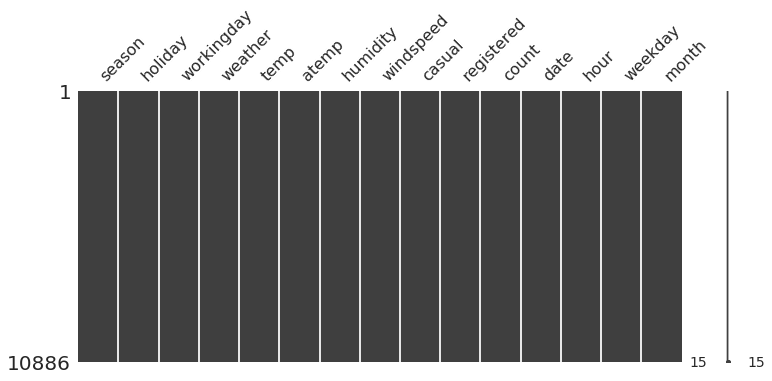

In [41]:
msno.matrix(train,figsize=(12,5))

In [32]:
# data = train.append(test)
# data.reset_index(inplace=True)
# data.drop('index', inplace=True, axis=1)
# data["date"] = data.datetime.apply(lambda x : x.split()[0])
# data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
# data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
# data["weekday"] = data.date.apply(lambda date_str : datetime.strptime(date_str, "%Y-%m-%d").weekday())
# data["month"] = data.date.apply(lambda date_str : datetime.strptime(date_str, "%Y-%m-%d").month)

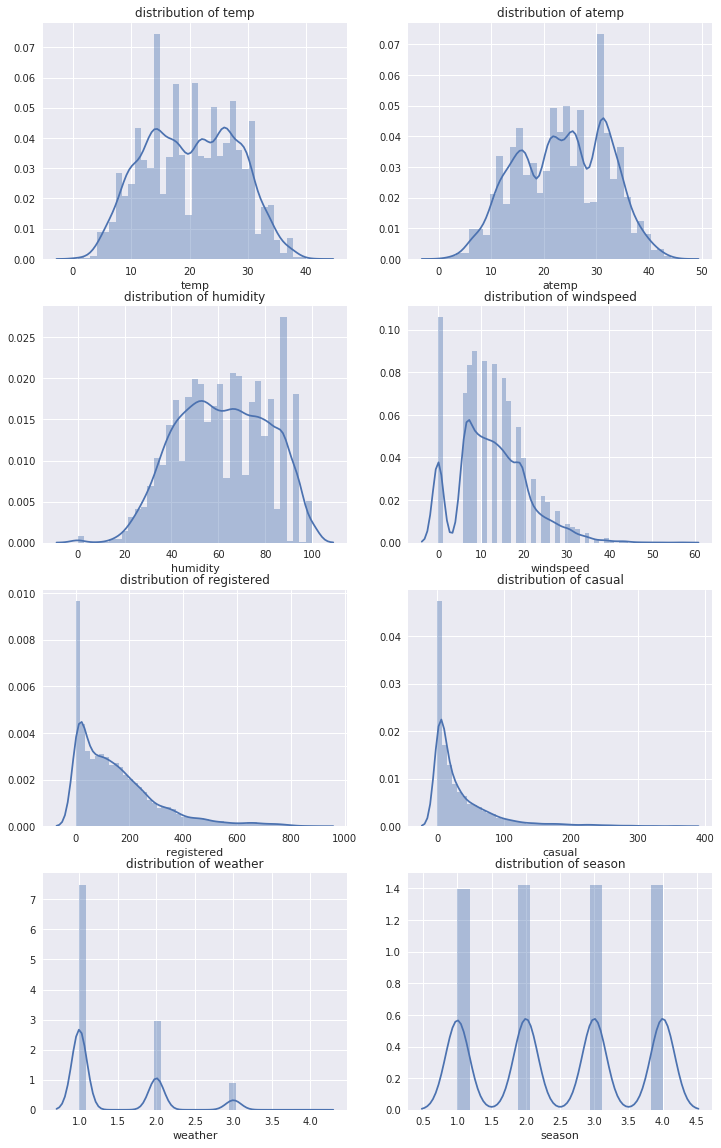

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12,20)
sns.distplot(train.temp, ax=axes[0][0])
sns.distplot(train.atemp, ax=axes[0][1])
sns.distplot(train.humidity, ax=axes[1][0])
sns.distplot(train.windspeed, ax=axes[1][1])
sns.distplot(train.registered, ax=axes[2][0])
sns.distplot(train.casual, ax=axes[2][1])
sns.distplot(train.weather, ax=axes[3][0])
sns.distplot(train.season, ax=axes[3][1])

axes[0][0].set(xlabel='temp',title="distribution of temp")
axes[0][1].set(xlabel='atemp',title="distribution of atemp")
axes[1][0].set(xlabel='humidity',title="distribution of humidity")
axes[1][1].set(xlabel='windspeed',title="distribution of windspeed")
axes[2][0].set(xlabel='registered',title="distribution of registered")
axes[2][1].set(xlabel='casual',title="distribution of casual")
axes[3][0].set(xlabel='weather',title="distribution of weather")
axes[3][1].set(xlabel='season',title="distribution of season")

plt.show()

In [34]:
train[train['weather']==4].head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
5631,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012-01-09,18,0,1


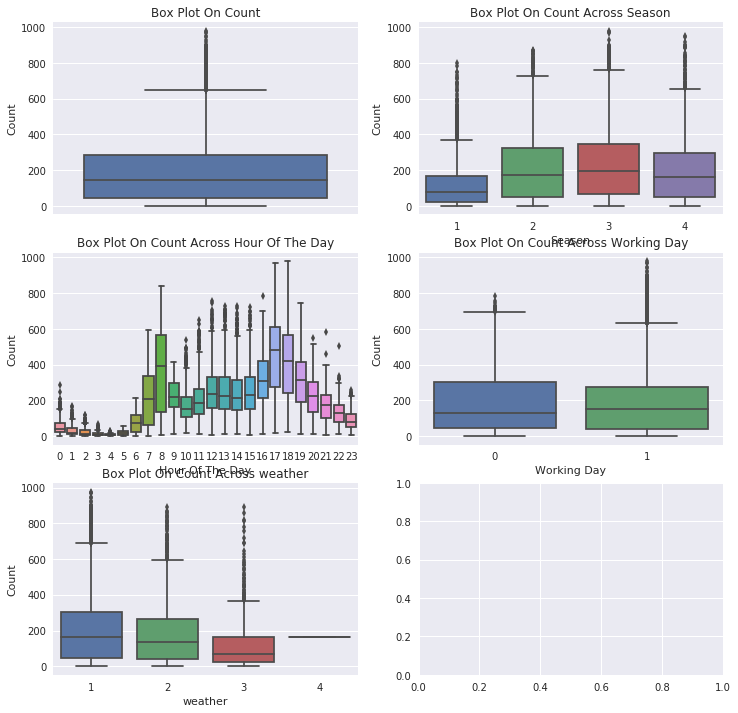

In [35]:
fig, axes = plt.subplots(nrows=3,ncols=2)

fig.set_size_inches(12, 12)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="count",x="weather",orient="v",ax=axes[2][0])


axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='weather', ylabel='Count',title="Box Plot On Count Across weather")


plt.show()

In [36]:
train_wo_outliers = train[np.abs(train["count"]-train["count"].mean()) <= (3*train["count"].std())]

In [37]:
print train.shape
print train_wo_outliers.shape

(10886, 15)
(10739, 15)


In [38]:
train_wo_outliers[['season','month']].groupby(['season','month']).count()
# 1,2,3 = spring , wtf????

Empty DataFrame
Columns: []
Index: [(1, 1), (1, 2), (1, 3), (2, 4), (2, 5), (2, 6), (3, 7), (3, 8), (3, 9), (4, 10), (4, 11), (4, 12)]

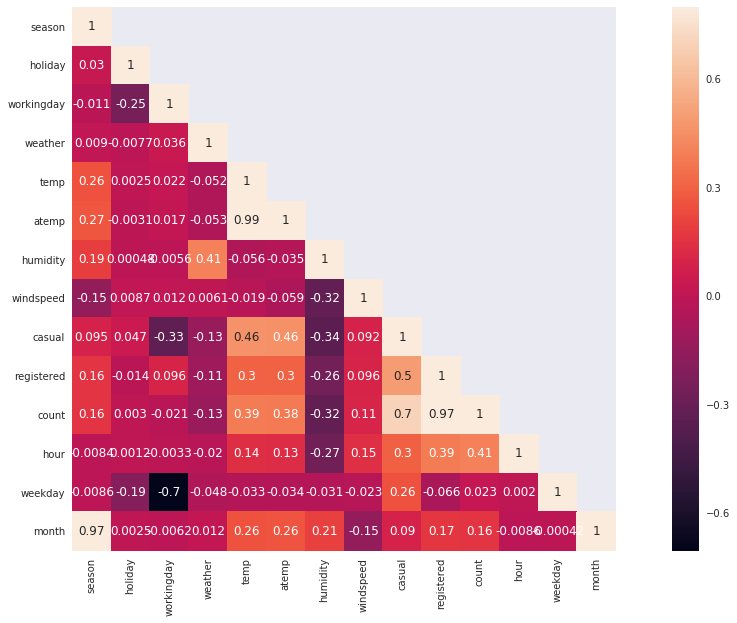

In [39]:
corr_mat = train_wo_outliers.corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_mat, mask=mask, vmax=.8,square=True, annot=True)
plt.show()

In [40]:
corr_mat['count']

season        0.159801
holiday       0.002978
workingday   -0.020764
weather      -0.127519
temp          0.385954
atemp         0.381967
humidity     -0.317028
windspeed     0.106074
casual        0.704764
registered    0.966209
count         1.000000
hour          0.405437
weekday       0.022602
month         0.164673
Name: count, dtype: float64

In [44]:
np.log(np.log(10))

0.83403244524795594

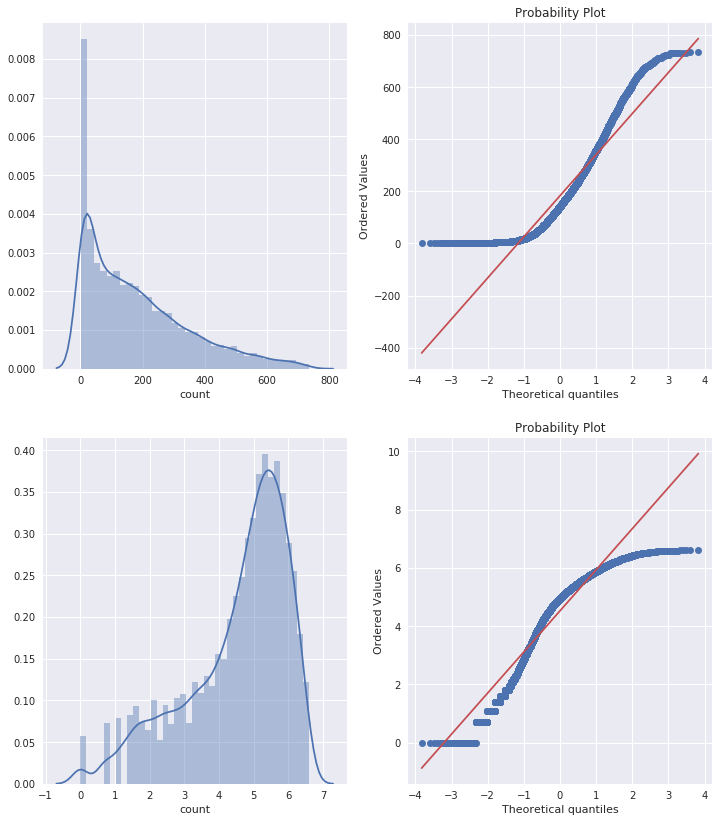

-0.990164921243


In [51]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 14)
sns.distplot(train_wo_outliers["count"],ax=axes[0][0])
stats.probplot(train_wo_outliers["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(train_wo_outliers["count"]),ax=axes[1][0])
stats.probplot(np.log(train_wo_outliers["count"]), dist='norm', fit=True, plot=axes[1][1])

# sns.distplot(np.log(np.log(train_wo_outliers["count"])),ax=axes[2][0])

# stats.probplot(np.log(np.log(train_wo_outliers["count"])), dist='norm', fit=True, plot=axes[2][1])


plt.show()
print np.log(train_wo_outliers["count"]).skew()


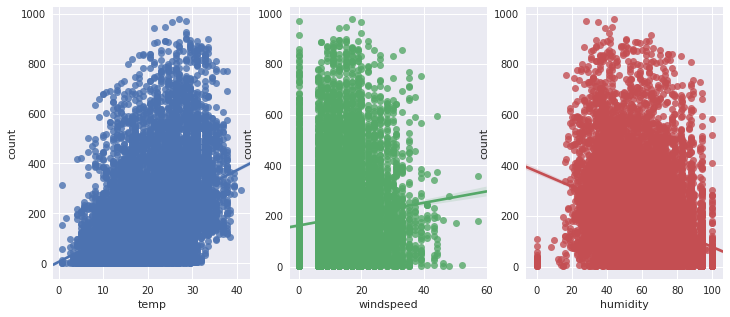

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)
plt.show()

In [370]:
pd.DataFrame(train.groupby("month")["count"].mean()).reset_index()

,month,count
0,1,90.366516
1,2,110.003330
2,3,148.169811
3,4,184.160616
4,5,219.459430
5,6,242.031798
6,7,235.325658
7,8,234.118421
8,9,233.805281
9,10,227.699232


In [371]:
x = sorted(train['weekday'].unique().tolist())
print x

[0, 1, 2, 3, 4, 5, 6]


In [372]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null int64
weekday       10886 non-null int64
month         10886 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 1.2+ MB


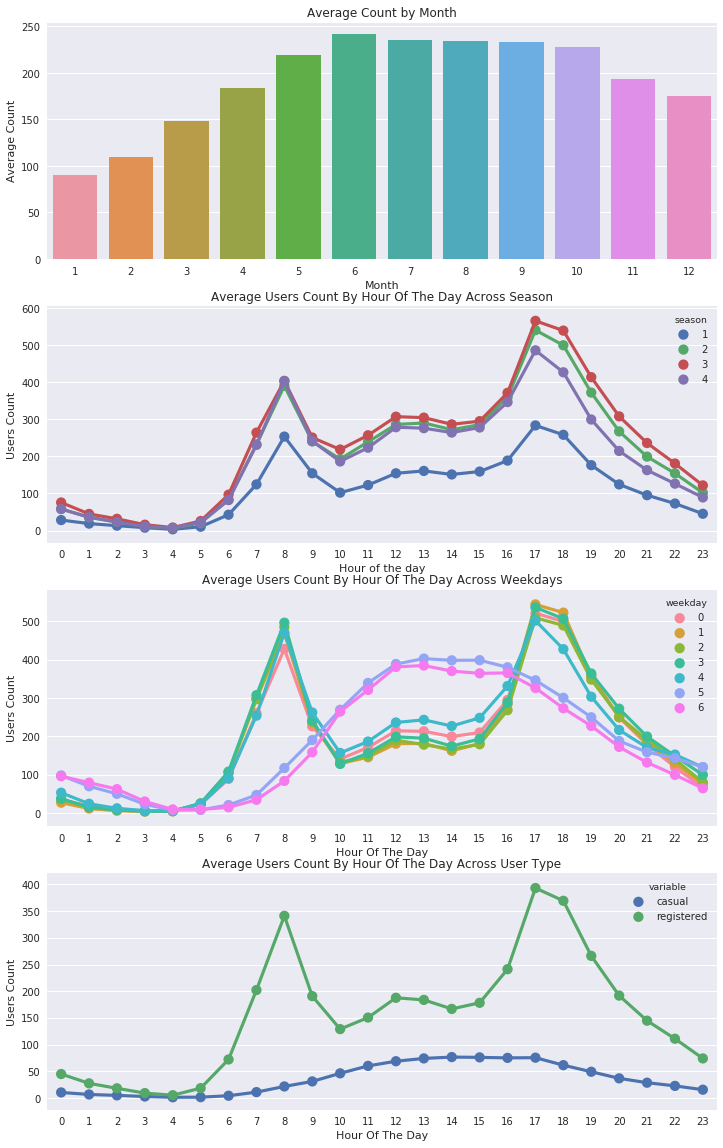

In [373]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(train.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data = monthSorted, x="month", y="count", ax=ax1)
ax1.set(xlabel='Month', ylabel='Average Count', title="Average Count by Month")

hourAggregated = pd.DataFrame(train.groupby(["hour", "season"])["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"], hue=hourAggregated["season"], 
              data=hourAggregated, join=True, ax=ax2)
ax2.set(xlabel='Hour of the day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Season", label='big')

hourAggregated = pd.DataFrame(train.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],
              hue=hourAggregated["weekday"], data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(train[["hour", "casual", "registered"]], id_vars=['hour'], value_vars=['casual','registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"], sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"],y=hourAggregated["value"], hue=hourAggregated["variable"],
              hue_order=["casual", "registered"], data=hourAggregated, join=True, ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')
plt.show()



In [261]:
train[["hour","casual","registered"]].head(3)

,hour,casual,registered
0,0,3,13
1,1,8,32
2,2,5,27
